# Directorio y cargar datos

In [ ]:
import pandas as pd

In [ ]:
# Especificar entorno (visual_studio o colab)
conectado_desde = 'colab'

In [ ]:
if conectado_desde == 'visual_studio':
    import os
    os.chdir('C:\\Users\\LENOVO\\OneDrive\\Escritorio\\Python\\PlazaVea')
elif conectado_desde == 'colab':
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    %cd '/content/drive/MyDrive/Datos Python/Plaza vea'
else:
    raise ValueError('Introduce una opción válida (visual_studio / colab)')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-b6c68faab4c7>", line 7, in <cell line: 1>
    get_ipython().run_line_magic('cd', "'/content/drive/MyDrive/Datos Python/Plaza vea'")
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local

In [ ]:
# Cargar datos
base = pd.read_csv('plaza_vea.csv', encoding='UTF-8', parse_dates = ['fecha'])

<ipython-input-5-880de7dcf87f>:2: DtypeWarning: Columns (8,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('plaza_vea.csv', encoding='UTF-8', parse_dates = ['fecha'])


In [ ]:
# Para no tener que estar cargando el csv nuevamente si me equivoco y tengo que volver a importar la base de datos
b3 = base.copy()

In [ ]:
b3.head()

,Unnamed: 0,id_unico,fecha,categoria,subcategoria,grupo,marca,descripcion,especif,id,precio.online,precio.oh,precio.regular,medida,descuento,descuento_oh,azucar,grasas,sodio,trans
0,0,1,2016-07-26,abarrotes,arroz,especiales,costeño,arroz costeño arborio,bolsa 750g,arroz costeño arborio-bolsa 750g,5.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2016-07-26,abarrotes,arroz,especiales,costeño,arroz costeño parbolizado selecto,bolsa 750g,arroz costeño parbolizado selecto-bolsa 750g,3.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,2016-07-26,abarrotes,arroz,especiales,paisana,arroz paisana arborio perfecto,bolsa 1k,arroz paisana arborio perfecto-bolsa 1k,7.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,2016-07-26,abarrotes,arroz,especiales,scotti,arroz scotti basmati,caja 500g,arroz scotti basmati-caja 500g,8.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,2016-07-26,abarrotes,desayunos,cereales,la cosecha,cereal la cosecha arroz de chocolate,bolsa 200g,cereal la cosecha arroz de chocolate-bolsa 200g,5.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quedándome con lo necesario

In [ ]:
b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908653 entries, 0 to 7908652
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   fecha           datetime64[ns]
 2   categoria       object        
 3   subcategoria    object        
 4   grupo           object        
 5   marca           object        
 6   descripcion     object        
 7   especif         object        
 8   id              object        
 9   precio.online   float64       
 10  precio.oh       float64       
 11  precio.regular  float64       
 12  medida          object        
 13  descuento       object        
 14  descuento_oh    object        
 15  azucar          object        
 16  grasas          object        
 17  sodio           object        
 18  trans           object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(14)
memory usage: 1.1+ GB


In [ ]:
# Genero una variable identificadora única por observación
b3.rename(columns={'Unnamed: 0':'id_unico'},inplace=True)

In [ ]:
b3.isna().sum()

id_unico                0
fecha                   0
categoria               0
subcategoria            0
grupo              489057
marca                5377
descripcion             0
especif           1339249
id                2697759
precio.online     1612115
precio.oh         7748799
precio.regular    7366788
medida            7590186
descuento         7340973
descuento_oh      7790688
azucar            7147895
grasas            7147895
sodio             7147895
trans             7147895
dtype: int64

# Clasificación

## Correcciones iniciales para categorías

In [ ]:
## Para panaderia/pasteleria
b3.loc[b3['categoria'].isin(["panaderia, pasteleria y comidas", "panaderia pasteleria y comidas", "panederia/pasteleria"]), 'categoria'] = "panaderia_pasteleria"

## Para frutas/verduras
b3.loc[b3['categoria'].isin(["frutas/verduras", "frutas y verduras"]), 'categoria'] = "frutas_verduras"

## Para cuidado bebe
b3.loc[b3['categoria'].isin(["cuidado/bebe", "cuidado del bebé","cuidado/bebé"]), 'categoria'] = "cuidado_bebe"

## Para lacteos/quesos/fiambres
b3.loc[b3['categoria'].isin(["lacteos/quesos/fiambres", "lacteos, quesos y fiambres","quesos/fiambres","lacteos/huevos"]), 'categoria'] = "lacteos_quesos_fiambres_huevos"

## Para carnes/aves/pescados
b3.loc[b3['categoria'].isin(["carnes, aves y pescados", "carnes/pescados"]), 'categoria'] = "carnes_aves_pescados"

## Para los demás
b3.replace({'cuidado/personal':'cuidado_personal','hogar/limpieza':'hogar_limpieza'},inplace=True)

In [ ]:
# Ahora hay 12 categorías incluyendo 'na'
b3['categoria'].value_counts()

abarrotes                         2732930
bebidas                           1456676
lacteos_quesos_fiambres_huevos     941979
cuidado_bebe                       797638
panaderia_pasteleria               573404
cuidado_personal                   430668
hogar_limpieza                     332454
carnes_aves_pescados               241612
frutas_verduras                    195773
frescos                            140735
mascotas                            64782
na                                      2
Name: categoria, dtype: int64

## Correcciones de subcategorias


### Trabajo previo

In [ ]:
def separar_subcategorias(cat,subcat_actual,grupos_subcat_nuevas):
  """
      Separa una subcategoría que agrega muchas otras subcategorias.
      Argumentos:
      - cat (str): La categoría del producto.
      - subcat_actual (str): La subcategoría actual del producto, la cual comprende otras subcategorias.
      - grupos_subcat_nuevas (dict): Diccionario de strings donde las llaves son el grupo al que pertenece el producto y
        los valores la subcategoría a la que realmente pertenece.
  """
  # Contar cuántos valores hay inicialmente en la subcategoría
  counts_iniciales = len(b3.loc[(b3['categoria']==cat) & (b3['subcategoria']==subcat_actual),'subcategoria'])
  # Hace la reasignación de subcategorías
  for grupo, subcat_nueva in grupos_subcat_nuevas.items():
    b3.loc[(b3['categoria']==cat) & (b3['subcategoria']==subcat_actual) & (b3['grupo']==grupo),'subcategoria'] = subcat_nueva
  # Contar cuántos valores hay tras el proceso en la subcategoría
  counts_finales = len(b3.loc[(b3['categoria']==cat) & (b3['subcategoria']==subcat_actual),'subcategoria'])

  print('{} valores correctamente reasignados. Hay {} valores restantes en la subcategoria {}.'.format(counts_iniciales-counts_finales, counts_finales, subcat_actual))

In [ ]:
def buscar_palabra(cat, subcat_actual, col_busqueda, palabra, subcat_nueva):
  """
      Busca una palabra en col_busqueda, y cambia las subcategorias de las observaciones que la contengan a una subcategoría nueva.
      Argumentos:
      - cat (str): La categoría donde se está trabajando.
      - subcat_actual (str): La subcategoría donde se está trabajando.
      - col_busqueda (str): La columna donde se quiere buscar la palabra clave.
      - palabra (list or str): La(s) palabra(s) que se quiere buscar.
      - subcat_nueva (str): La subcategoría a donde se dirigirán las observaciones que contengan la palabra clave.
  """
  if isinstance(palabra,list): # si se pasa una lista de palabras como argumento
    total = 0
    for p in palabra:
      # Cuenta el número de veces que se encontró la palabra
      veces = b3.loc[(b3['categoria']==cat)&(b3['subcategoria']==subcat_actual)&(b3[col_busqueda].str.contains(p,regex=False)), col_busqueda].count()
      # Asigna las observaciones coincidentes a la subcategoría deseada.
      print('Buscando la palabra {}...'.format(p))
      b3.loc[(b3['categoria']==cat)&(b3['subcategoria']==subcat_actual)&(b3[col_busqueda].str.contains(p,regex=False)), 'subcategoria'] = subcat_nueva
      total += veces
  elif isinstance(palabra, str): # si se pasa una sola palabra como argumento
      # Cuenta el número de veces que se encontró la palabra
      total = b3.loc[(b3['categoria']==cat)&(b3['subcategoria']==subcat_actual)&(b3[col_busqueda].str.contains(palabra,regex=False)), col_busqueda].count()
      # Asigna las observaciones coincidentes a la subcategoría deseada.
      print('Buscando la palabra {}...'.format(palabra))
      b3.loc[(b3['categoria']==cat)&(b3['subcategoria']==subcat_actual)&(b3[col_busqueda].str.contains(palabra,regex=False)), 'subcategoria'] = subcat_nueva
  else:
    return 'El argumento "palabra" debe ser de formato list o string.'
  # Imprime el resultado
  print('Se movieron {} elementos a la subcategoria {}.'.format(total,subcat_nueva))

In [ ]:
# Número total de subcategorías antes de la agregación
b3['subcategoria'].unique().shape[0]

182

In [ ]:
# Lista con todas las categorias
lista_de_categorias = list(b3['categoria'].unique())
lista_de_categorias

['abarrotes',
 'hogar_limpieza',
 'cuidado_bebe',
 'cuidado_personal',
 'frutas_verduras',
 'carnes_aves_pescados',
 'lacteos_quesos_fiambres_huevos',
 'panaderia_pasteleria',
 'bebidas',
 'mascotas',
 'frescos',
 'na']

In [ ]:
# Elimino espacios y conectores en todas las subcategorias
for i in ['/',' y ',', ', '  ', ' ']:
  b3['subcategoria'] = b3['subcategoria'].str.replace(i,'_')

### 1. abarrotes

In [ ]:
b3[b3['categoria']=='abarrotes']['subcategoria'].value_counts()

desayunos                    541761
confiteria                   472397
snacks_piqueos               301083
salsas_cremas_condimentos    256701
abarrotes                    226954
conservas                    224515
fideos_pastas                169228
aceite                        80715
condimentos                   76542
menestras                     75007
comidas_instantaneas          73087
cremas_salsas                 68291
arroz                         44187
azucar_endulzantes            39943
galletas                      27734
golosinas                     24935
azúcar_endulzantes            16388
confitería                    10369
comidas_instantáneas           2826
frutas                          208
verduras                         47
canastas_navidenas               12
Name: subcategoria, dtype: int64

In [ ]:
# Confiterias y dulces
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["confitería", "golosinas", "confiteria"])), 'subcategoria'] = "dulces_confiteria"

# Snacks
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["snacks_piqueos", "galletas"])), 'subcategoria'] = "snacks_galletas"

# Salsas y condimentos
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["salsas_cremas_condimentos", "condimentos", "cremas_salsas"])), 'subcategoria'] = "salsas_condimentos"

# Comidas instantaneas
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["comidas_instantáneas"])), 'subcategoria'] = "comidas_instantaneas"

# Azucar y endulzantes
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["azúcar_endulzantes"])), 'subcategoria'] = "azucar_endulzantes"

# Frutas y verduras
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["frutas","verduras"])), 'subcategoria'] = "frutas_verduras"

# aceite_vinagre
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["aceite"])), 'subcategoria'] = "aceite_vinagre"


In [ ]:
# Desagregar la subcategoria abarrotes
b3.loc[(b3['categoria']=='abarrotes')&(b3['subcategoria']=='abarrotes'),'grupo'].value_counts()

desayunos                      59459
confiteria                     48767
salsas cremas y condimentos    30772
snacks y piqueos               21258
conservas                      16219
fideos y pastas                13425
aceite                          8474
comidas instantaneas            7280
menestras                       6196
azucar y endulzantes            4466
arroz                           3085
vino tinto                       366
Name: grupo, dtype: int64

In [ ]:
# Uso la función separar_subcategorias, que necesita un diccionario cuyas llaves son los grupos de la subcategoria a desagregar y los valores son las subcategorias correctas.
reemplazos_abarrotes = {'desayunos':'desayunos',
                        'confiteria':'dulces_confiteria',
                        'salsas cremas y condimentos':'salsas_condimentos',
                        'snacks y piqueos':'snacks_galletas',
                        'conservas':'conservas',
                        'fideos y pastas':'fideos_pastas',
                        'aceite':'aceite',
                        'comidas instantaneas':'comidas_instantaneas',
                        'menestras':'menestras',
                        'azucar y endulzantes':'azucar_endulzantes',
                        'arroz':'arroz'}
separar_subcategorias('abarrotes','abarrotes',reemplazos_abarrotes)

219401 valores correctamente reasignados. Hay 7553 valores restantes en la subcategoria abarrotes.


In [ ]:
# Separo lo restante de abarrotes
b3.loc[(b3['categoria']=='abarrotes')&(b3['subcategoria']=='abarrotes'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7287292,vino tinto,venturo,vinagre venturo de vino tinto botella 600ml,botella 600ml,NaN
7287300,vino tinto,del firme,vinagre del firme de vino tinto doypack 1l,doypack 1l,NaN
7287308,vino tinto,bell's,vinagre bell's de vino tinto botella 500ml,botella 500ml,NaN
7293204,vino tinto,venturo,vinagre venturo de vino tinto botella 600ml,botella 600ml,NaN
7293211,vino tinto,del firme,vinagre del firme de vino tinto doypack 1l,doypack 1l,NaN
...,...,...,...,...,...
7904567,vino tinto,venturo,vinagre venturo de vino tinto botella 600ml,botella 600ml,NaN
7904573,vino tinto,del firme,vinagre del firme de vino tinto doypack 1l,doypack 1l,NaN
7904580,vino tinto,bell's,vinagre bell's de vino tinto botella 500ml,botella 500ml,NaN
7904583,vino tinto,bell's,vinagre bell's vino tinto botella 250ml,botella 250ml,NaN


In [ ]:
# aceite_vinagre
buscar_palabra('abarrotes','abarrotes','descripcion',['aceite','vinagre'],'aceite_vinagre')
# arroz
buscar_palabra('abarrotes','abarrotes','descripcion','arroz','arroz')
# menestras
buscar_palabra('abarrotes','abarrotes','descripcion',['frijol','frejol','arveja','lentej','garbanzo','pallar','quinua','haba','maní'],'menestras_granos')
# snacks
buscar_palabra('abarrotes','abarrotes','descripcion','snack','snacks_galletas')
# azucar_endulzantes
buscar_palabra('abarrotes','abarrotes','descripcion',['azúcar','endulzante'],'azucar_endulzantes')
# fideos
buscar_palabra('abarrotes','abarrotes','descripcion',['fideo','vittorio','pasta','tallar'],'fideos_pastas')
# salsas
buscar_palabra('abarrotes','abarrotes','descripcion','salsa','salsas_condimentos')
# desayunos
buscar_palabra('abarrotes','abarrotes','descripcion',['café','cebada','avena','cereal','taza','mermelada','colin','infus'],'desayunos')
# comidas_instantaneas
buscar_palabra('abarrotes','abarrotes','descripcion','instantánea','comidas_instantaneas')
# suplementos_fortificantes
buscar_palabra('abarrotes','abarrotes','descripcion',['complemento','fortificante','suplemento'],'suplementos_fortificantes')

Buscando la palabra aceite...
Buscando la palabra vinagre...
Se movieron 881 elementos a la subcategoria aceite_vinagre.
Buscando la palabra arroz...
Se movieron 195 elementos a la subcategoria arroz.
Buscando la palabra frijol...
Buscando la palabra frejol...
Buscando la palabra arveja...
Buscando la palabra lentej...
Buscando la palabra garbanzo...
Buscando la palabra pallar...
Buscando la palabra quinua...
Buscando la palabra haba...
Buscando la palabra maní...
Se movieron 477 elementos a la subcategoria menestras_granos.
Buscando la palabra snack...
Se movieron 40 elementos a la subcategoria snacks_galletas.
Buscando la palabra azúcar...
Buscando la palabra endulzante...
Se movieron 193 elementos a la subcategoria azucar_endulzantes.
Buscando la palabra fideo...
Buscando la palabra vittorio...
Buscando la palabra pasta...
Buscando la palabra tallar...
Se movieron 414 elementos a la subcategoria fideos_pastas.
Buscando la palabra salsa...
Se movieron 207 elementos a la subcategoria 

In [ ]:
# lo demás lo coloco en otros
b3.loc[(b3['categoria']=='abarrotes')&(b3['subcategoria']=='abarrotes'),'subcategoria'] = 'otros'

### 2. hogar_limpieza

In [ ]:
b3[b3['categoria']=='hogar_limpieza']['subcategoria'].value_counts()

cuidado_hogar          66847
limpiadores            65094
cuidado_ropa           55740
accesorios_limpieza    46706
desinfectantes         38671
papeleria_hogar        32563
descartables           20111
accesorios_hogar        6722
Name: subcategoria, dtype: int64

In [ ]:
# limpieza
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(["limpiadores", "accesorios_limpieza", "desinfectantes"])), 'subcategoria'] = "limpieza"

### 3. cuidado_bebe

In [ ]:
b3[b3['categoria']=='cuidado_bebe']['subcategoria'].value_counts()

accesorios_para_bebe         227172
cuidado_del_bebe             124911
cuidado_aseo_del_bebe         78282
panales_toallitas_humedas     72149
alimentos_para_bebe           54527
cuidado_limpieza              47577
pañales_toallitas             35107
accesorios_bebe               25923
alimentos_bebe                23943
biberones_tetinas             23418
textil_para_bebe              23087
cuidado_aseo                  21435
rodados                       12678
textil_bebe                    7223
accesorios_para_bebé           7146
pañales_toallitas_húmedas      5481
alimentos_para_bebé            3948
cuidado_aseo_del_bebé          1425
textil_para_bebé               1302
alimentos_bebé                  904
Name: subcategoria, dtype: int64

In [ ]:
# Accesorios
b3.loc[(b3['categoria'] == 'cuidado_bebe') & (b3['subcategoria'].isin(["accesorios_para_bebe", "accesorios_bebe", "accesorios_para_bebé"])), 'subcategoria'] = "accesorios_bebe"

# Cuidado aseo del bebe
b3.loc[(b3['categoria'] == 'cuidado_bebe') & (b3['subcategoria'].isin(["cuidado_del_bebe", "cuidado_aseo_del_bebe", "panales_toallitas_humedas",'pañales_toallitas','cuidado_limpieza','cuidado_aseo','pañales_toallitas_húmedas','cuidado_aseo_del_bebé'])), 'subcategoria'] = "cuidado_aseo_bebe"

# Alimentos
b3.loc[(b3['categoria'] == 'cuidado_bebe') & (b3['subcategoria'].isin(["alimentos_para_bebe", "alimentos_bebe", "alimentos_para_bebé", 'alimentos_bebé'])), 'subcategoria'] = "alimentos_bebe"

# Textil
b3.loc[(b3['categoria'] == 'cuidado_bebe') & (b3['subcategoria'].isin(["textil_para_bebe", "textil_bebe", "textil_para_bebé"])), 'subcategoria'] = "textil_bebe"

### 4. cuidado_personal

In [ ]:
b3[b3['categoria']=='cuidado_personal']['subcategoria'].value_counts()

cuidado_cabello             107479
perfumeria                   64735
cuidado_piel                 56686
cuidado_bucal                56289
jabones_tocador_liquidos     43543
proteccion_femenina          40018
afeitado                     28935
farmacia                     18273
panales_toallas_adultos      10909
maquillaje                    3459
pañales_toallas_adultos        342
Name: subcategoria, dtype: int64

In [ ]:
# panales_adultos
b3['subcategoria'].replace({'pañales_toallas_adultos':'panales_adultos','panales_toallas_adultos':'panales_adultos'},inplace=True)
# perfumeria_maquillaje
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(['perfumeria','maquillaje'])), 'subcategoria'] = "perfumeria_maquillaje"
# cuidado_piel
b3.loc[(b3['categoria'] == 'abarrotes') & (b3['subcategoria'].isin(['afeitado','cuidado_piel'])), 'subcategoria'] = "cuidado_piel"

### 5. frutas_verduras

Esta sección mejor va en abarrotes pues no presenta gran relevancia. De hecho abarrotes ya considera algunas cuantas observaciones de frutas y verduras. Lo que se hará acá es unificar todas las frutas y verduras en la misma subcategoría y que la categoria `frutas_verduras` sea parte de la categoria `abarrotes`.

In [ ]:
# Cuento qué subcategorías hay
b3[b3['categoria']=='frutas_verduras']['subcategoria'].value_counts()

verduras               114212
frutas                  59721
frutas_verduras         13966
verduras_congeladas      4625
frutas_congeladas        3249
Name: subcategoria, dtype: int64

In [ ]:
# frutas_verduras
b3.loc[(b3['categoria'] == 'frutas_verduras') & (b3['subcategoria'].isin(["verduras", "frutas", "frutas_verduras",'verduras_congeladas','frutas_congeladas'])), 'subcategoria'] = "frutas_verduras"

In [ ]:
# abarrotes
b3.loc[b3['categoria']=='frutas_verduras','categoria'] = 'abarrotes'

### 6. carnes_aves_pescados

In [ ]:
b3[b3['categoria']=='carnes_aves_pescados']['subcategoria'].value_counts()

res                              37665
hamburguesas_nuggets_apanados    33968
masas_pastas_bocaditos_salsas    30479
cerdo                            27894
pescados_mariscos                23289
pollo                            20853
congelados                       13977
carnes_aves_pescados             12196
aves                              9734
vacuno                            8369
pavo                              6957
panes_pastas_bocaditos_salsas     4732
enrollados                        3738
pescados                          3615
helados_postres                   2293
mariscos                           977
comidas_listas                     876
Name: subcategoria, dtype: int64

In [ ]:
# carnes
b3.loc[(b3['categoria'] == 'carnes_aves_pescados') & (b3['subcategoria'].isin(["res", "vacuno","cerdo"])), 'subcategoria'] = "carnes_res_cerdo"

# masas_bocaditos_salsas
b3.loc[(b3['categoria'] == 'carnes_aves_pescados') & (b3['subcategoria'].isin(["masas_pastas_bocaditos_salsas", "panes_pastas_bocaditos_salsas"])), 'subcategoria'] = "masas_bocaditos_salsas"

# aves
b3.loc[(b3['categoria'] == 'carnes_aves_pescados') & (b3['subcategoria'].isin(["pollo","pavo",'aves'])), 'subcategoria'] = "carnes_aves"

# pescados_mariscos
b3.loc[(b3['categoria'] == 'carnes_aves_pescados') & (b3['subcategoria'].isin(["mariscos", "pescados"])), 'subcategoria'] = "pescados_mariscos"

In [ ]:
# Las subcategorías masas_bocaditos_salsas y helados_postres pertenecen a la categoría panadería y pastelería
b3.loc[b3['subcategoria']=='masas_bocaditos_salsas','categoria'] = 'panaderia_pasteleria'
b3.loc[b3['subcategoria']=='helados_postres','categoria'] = 'panaderia_pasteleria'

In [ ]:
# Las salsas sí corresponden a carnes_aves_pescados
b3.loc[(b3['subcategoria']=='masas_bocaditos_salsas') & (b3['grupo']=='salsas congeladas'), 'categoria'] = 'carnes_aves_pescados' #Categoría
b3.loc[(b3['subcategoria']=='masas_bocaditos_salsas') & (b3['grupo']=='salsas congeladas'), 'subcategoria'] = 'salsas' #Subcategoría

In [ ]:
# Actualizo el nombre de masas_bocaditos_salsas en panaderia_pasteleria
b3.loc[(b3['subcategoria']=='masas_bocaditos_salsas') & (b3['categoria']=='panaderia_pasteleria') ,'subcategoria'] = 'masas_bocaditos'

In [ ]:
# Elementos de la subcategoria carnes_aves_pescados
b3.loc[(b3['categoria']=='carnes_aves_pescados')&(b3['subcategoria']=='carnes_aves_pescados'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7284186,res,el buen corte,carne molida de res el buen corte precio x kg,precio x kg,NaN
7284187,res,el buen corte,carne molida light de res el buen corte empaca...,NaN,NaN
7284188,res,el buen corte,carne molida light de res el buen corte precio...,precio x kg,NaN
7284189,res,el buen corte,bisteck de res el buen corte precio x kg,precio x kg,NaN
7284190,res,el buen corte,guiso tierno de res el buen corte precio x kg,precio x kg,NaN
...,...,...,...,...,...
7900284,pollo,plaza vea,hamburguesa de pollo parrillera premium,precio x kg,NaN
7900324,pavo,san fernando,rodaja de pierna de pavita san fernando,precio x kg,NaN
7900325,pavo,san fernando,medallones de pavita san fernando,precio x kg,NaN
7900326,pavo,plaza vea,filete de pechuga de pavita,precio x kg,NaN


In [ ]:
# Separo la subcategoría carnes_aves_pescados
buscar_palabra('carnes_aves_pescados','carnes_aves_pescados','grupo',['res','cerdo'],'carnes_res_cerdo')
buscar_palabra('carnes_aves_pescados','carnes_aves_pescados','grupo',['pollo','pavo'],'carnes_aves')

Buscando la palabra res...
Buscando la palabra cerdo...
Se movieron 7315 elementos a la subcategoria carnes_res_cerdo.
Buscando la palabra pollo...
Buscando la palabra pavo...
Se movieron 4437 elementos a la subcategoria carnes_aves.


In [ ]:
b3.head()

,id_unico,fecha,categoria,subcategoria,grupo,marca,descripcion,especif,id,precio.online,precio.oh,precio.regular,medida,descuento,descuento_oh,azucar,grasas,sodio,trans
0,1,2016-07-26,abarrotes,arroz,especiales,costeño,arroz costeño arborio,bolsa 750g,arroz costeño arborio-bolsa 750g,5.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016-07-26,abarrotes,arroz,especiales,costeño,arroz costeño parbolizado selecto,bolsa 750g,arroz costeño parbolizado selecto-bolsa 750g,3.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016-07-26,abarrotes,arroz,especiales,paisana,arroz paisana arborio perfecto,bolsa 1k,arroz paisana arborio perfecto-bolsa 1k,7.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016-07-26,abarrotes,arroz,especiales,scotti,arroz scotti basmati,caja 500g,arroz scotti basmati-caja 500g,8.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016-07-26,abarrotes,desayunos,cereales,la cosecha,cereal la cosecha arroz de chocolate,bolsa 200g,cereal la cosecha arroz de chocolate-bolsa 200g,5.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Muevo las observaciones restantes
buscar_palabra('carnes_aves_pescados','carnes_aves_pescados','descripcion',['res','cerdo','bife','lomo'],'carnes_res_cerdo')
buscar_palabra('carnes_aves_pescados','carnes_aves_pescados','descripcion',['pollo','pavo','pavita'],'carnes_aves')

Buscando la palabra res...
Buscando la palabra cerdo...
Buscando la palabra bife...
Buscando la palabra lomo...
Se movieron 242 elementos a la subcategoria carnes_res_cerdo.
Buscando la palabra pollo...
Buscando la palabra pavo...
Buscando la palabra pavita...
Se movieron 120 elementos a la subcategoria carnes_aves.


In [ ]:
# Lo demás lo cambiaré a la subcategoría otros
b3.loc[(b3['categoria'] == 'carnes_aves_pescados') & (b3['subcategoria']=='carnes_aves_pescados'), 'subcategoria'] = "otros"

### 7. lacteos_quesos_fiambres_huevos

In [ ]:
b3[b3['categoria']=='lacteos_quesos_fiambres_huevos']['subcategoria'].value_counts()

lacteos_leche            366837
quesos                   207286
fiambres                 155340
embutidos                115855
mantequilla_margarina     39215
quesos_fiambres           34048
huevos                    11725
helados                   10719
piqueos                    4325
tocinos_chicharrones       1751
otros                       431
Name: subcategoria, dtype: int64

In [ ]:
# Muevo los quesos
buscar_palabra('lacteos_quesos_fiambres_huevos','quesos_fiambres','descripcion','queso','quesos')
# Todo lo demás en quesos_fiambres son fiambres
b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria']=='quesos_fiambres'), 'subcategoria'] = "fiambres"

Buscando la palabra queso...
Se movieron 13609 elementos a la subcategoria quesos.


In [ ]:
# Separar lacteos_huevos
separar_subcategorias('lacteos_quesos_fiambres_huevos','lacteos_huevos',{'mantequilla y margarina':'mantequilla_margarina','huevos':'huevos'})
# Ahora lacteos_huevos contiene solo lacteos

4266 valores correctamente reasignados. Hay 24611 valores restantes en la subcategoria lacteos_huevos.


In [ ]:
# quesos
quesos_lista = [
    'quesos','quesos_duros_semiduros','quesos_especiales_regionales', 'quesos_duros',
    'quesos_blandos','quesos_semiduros','quesos_fundidos_untables','quesos_procesados',
    ]

b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria'].isin(quesos_lista)), 'subcategoria'] = "quesos"

# fiambres
fiambres_lista = ['fiambres','fiambres_gourmet','otros_fiambres','jamones_jamonadas','jamonadas_jamones_cocidos']
b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria'].isin(fiambres_lista)), 'subcategoria'] = "fiambres"

# embutidos
b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria'].isin(['embutidos','salames_salchichones','jamones_madurados'])), 'subcategoria'] = "embutidos"

# lacteos_leche
lacteos_leche_lista = ['yogurt','lacteos','leche','leche_uht_larga_vida','leche_evaporada','leche_fresca','leche_polvo','lacteos_huevos']
b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria'].isin(lacteos_leche_lista)), 'subcategoria'] = "lacteos_leche"

# piqueos
b3.loc[(b3['categoria'] == 'lacteos_quesos_fiambres_huevos') & (b3['subcategoria'].isin(['pates_piqueos','tablas_piqueos'])), 'subcategoria'] = "piqueos"


### 8. panaderia_pasteleria

In [ ]:
b3.loc[b3['categoria']=='panaderia_pasteleria','subcategoria'].value_counts()

reposteria                       180811
pan_envasado                     108102
panaderia_pasteleria_comidas      39240
postres                           36121
masas_bocaditos                   31961
tortas                            27385
panederia_de_la_casa              24954
comidas_preparadas_congeladas     23155
kekes_chifones                    22651
pan_de_la_casa                    22559
kekes_chifones_bocaditos          21008
bocaditos_acompanamientos         18776
tortillas_masas                   12752
masas                             12107
repostería                         9708
panetones                          8350
comidas_preparadas                 5120
helados_postres                    2293
bocaditos_acompañamientos           318
panaderia_de_la_casa                287
Name: subcategoria, dtype: int64

Las categorías que quedarán serán: reposteria, panaderia, kekes, masas_bocaditos, comidas_preparadas

In [ ]:
# Separando panaderia_pasteleria_comidas
b3.loc[b3['subcategoria']=='panaderia_pasteleria_comidas','grupo'].value_counts()

reposteria                     16031
postres                         8394
pan envasado                    7671
pan de la casa                  2405
comidas listas y rostizados     1705
tortillas y masas               1567
cenas navidenas                  302
Name: grupo, dtype: int64

In [ ]:
panaderia_reemplazos = {'reposteria':'reposteria','postres':'reposteria',
                        'pan envasado':'panaderia','pan de la casa':'panaderia','tortillas y masas': 'panaderia',
                        'comidas listas y rostizados':'comidas_preparadas','cenas navidenas':'comidas_preparadas'}
separar_subcategorias('panaderia_pasteleria','panaderia_pasteleria_comidas',panaderia_reemplazos)

38075 valores correctamente reasignados. Hay 1165 valores restantes en la subcategoria panaderia_pasteleria_comidas.


In [ ]:
# Elementos restantes de panaderia_pasteleria_comidas
b3.loc[(b3['categoria']=='panaderia_pasteleria')&(b3['subcategoria']=='panaderia_pasteleria_comidas'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7391878,NaN,bell's,pan de molde blanco bell's grande bolsa 800g,NaN,NaN
7391879,NaN,pyc,pan de molde integral pyc mediano bolsa 500g,NaN,NaN
7391880,NaN,bimbo,pan de molde integral bimbo sin bordes bolsa 6...,NaN,NaN
7391881,NaN,bell's,pan de molde blanco bell’s tipo fuente corte h...,NaN,NaN
7391882,NaN,pyc,pan integral pyc fibra miel bolsa 360g,NaN,NaN
...,...,...,...,...,...
7405042,NaN,bell's,nueces peladas bell's táper 100g,NaN,NaN
7405043,NaN,bell's,coco rallado bell's táper 100g,NaN,NaN
7405044,NaN,bell's,pasas rubias bell's táper 150g,NaN,NaN
7405045,NaN,trigal,coco rallado fino trigal doypack 500g,NaN,NaN


In [ ]:
# Asignar a las subcategorias correctas
buscar_palabra('panaderia_pasteleria','panaderia_pasteleria_comidas','descripcion',['pan','tostada'],'panaderia')
buscar_palabra('panaderia_pasteleria','panaderia_pasteleria_comidas','descripcion',['tamal','tortilla','masa'],'masas_bocaditos')
buscar_palabra('panaderia_pasteleria','panaderia_pasteleria_comidas','descripcion',['papas','gaseosa','casa'],'comidas_preparadas')
buscar_palabra('panaderia_pasteleria','panaderia_pasteleria_comidas','descripcion',['gelatina','mezcla','flan','mazamorra','harina'],'reposteria')

Buscando la palabra pan...
Buscando la palabra tostada...
Se movieron 360 elementos a la subcategoria panaderia.
Buscando la palabra tamal...
Buscando la palabra tortilla...
Buscando la palabra masa...
Se movieron 61 elementos a la subcategoria masas_bocaditos.
Buscando la palabra papas...
Buscando la palabra gaseosa...
Buscando la palabra casa...
Se movieron 76 elementos a la subcategoria comidas_preparadas.
Buscando la palabra gelatina...
Buscando la palabra mezcla...
Buscando la palabra flan...
Buscando la palabra mazamorra...
Buscando la palabra harina...
Se movieron 232 elementos a la subcategoria reposteria.


In [ ]:
# Lo restante lo muevo a una categoría otros
b3.loc[(b3['subcategoria']=='panaderia_pasteleria_comidas'),'subcategoria'] = 'otros'

In [ ]:
# Separando kekes_chifones_bocaditos
condicion_keke = b3.loc[b3['subcategoria']=='panaderia_pasteleria_comidas','grupo'].str.contains('keke')
b3.loc[(b3['subcategoria']=='panaderia_pasteleria_comidas') & (condicion_keke),'subcategoria'] = 'kekes_panetones'
# Ahora kekes_chifones_bocaditos solo contiene bocaditos

In [ ]:
# kekes_panetones
b3.loc[(b3['categoria'] == 'panaderia_pasteleria') & (b3['subcategoria'].isin(['kekes_chifones','kekes','panetones'])), 'subcategoria'] = "kekes_panetones"

# reposteria
b3.loc[(b3['categoria'] == 'panaderia_pasteleria') & (b3['subcategoria'].isin(['reposteria','postres','tortas','repostería','helados_postres'])), 'subcategoria'] = "reposteria"

# panaderia
b3.loc[(b3['categoria'] == 'panaderia_pasteleria') & (b3['subcategoria'].isin(['pan_envasado','panederia_de_la_casa','pan_de_la_casa','panaderia_de_la_casa'])), 'subcategoria'] = "panaderia"

# masas_bocaditos
b3.loc[(b3['categoria'] == 'panaderia_pasteleria') & (b3['subcategoria'].isin(['masas_bocaditos','kekes_chifones_bocaditos','tortillas_masas','masas','bocaditos_acompanamientos','bocaditos_acompañamientos'])), 'subcategoria'] = "masas_bocaditos"

# comidas_preparadas
b3.loc[(b3['categoria'] == 'panaderia_pasteleria') & (b3['subcategoria'].isin(['comidas_preparadas_congeladas','comidas_preparadas'])), 'subcategoria'] = "comidas_preparadas"


### 9. bebidas

In [ ]:
b3.loc[b3['categoria']=='bebidas','subcategoria'].value_counts()

vinos                     390152
licores_tabaco            206363
jugos                     182135
licores                   141959
bebidas                   109407
aguas                      98761
cervezas                   98236
espumantes                 73005
gaseosas                   69208
funcionales                45284
bebidas_funcionales        15349
jugos_naturales             7725
te_bebible                  6168
te_liquido                  5388
agua                        5317
packs_de_vinos_licores      2219
Name: subcategoria, dtype: int64

In [ ]:
# Separando licores_tabaco
b3.loc[(b3['subcategoria']=='licores_tabaco') & (b3['grupo']=='tabaco'),'subcategoria'] = 'tabaco'

In [ ]:
# Separando bebidas
b3.loc[(b3['categoria']=='bebidas')&(b3['subcategoria']=='bebidas'),'grupo'].value_counts()

licores y tabaco       36905
vinos                  32576
jugos                  15345
aguas                   8698
espumantes              6165
vino tinto              3987
bebidas funcionales     1971
cervezas                 252
Name: grupo, dtype: int64

In [ ]:
bebidas_reemplazos = {'aguas':'agua','vinos':'vinos','vino tinto':'vinos','jugos':'jugos','espumantes':'espumantes','bebidas funcionales':'funcionales','cervezas':'cervezas'}
separar_subcategorias('bebidas','bebidas',bebidas_reemplazos)

68994 valores correctamente reasignados. Hay 40413 valores restantes en la subcategoria bebidas.


In [ ]:
# Separar subcategoria bebidas
b3.loc[(b3['categoria']=='bebidas')&(b3['subcategoria']=='bebidas'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7288196,licores y tabaco,johnnie walker,whisky johnnie walker double black botella 750...,NaN,NaN
7288197,licores y tabaco,something special,whisky something special clásico botella 750ml,botella 750ml,NaN
7288198,licores y tabaco,old parr,whisky grand old parr 12 años extra rich botel...,NaN,NaN
7288199,licores y tabaco,johnnie walker,whisky johnnie walker gold label reserve botel...,NaN,NaN
7288200,licores y tabaco,something special,pack whisky something special botella 750ml ca...,NaN,NaN
...,...,...,...,...,...
7906358,licores y tabaco,l&m,cigarros l&m fusion caja 10un,caja 10un,NaN
7906359,licores y tabaco,kent,cigarros kent blue caja 10un,caja 10un,NaN
7906360,licores y tabaco,pall mall,cigarros pall mall click on blue caja 10un,caja 10un,NaN
7906361,licores y tabaco,marlboro,cigarros marlboro blue ice mint caja 10un,caja 10un,NaN


In [ ]:
buscar_palabra('bebidas','bebidas','descripcion',['cigarro','cigarrillo','tabaco'],'tabaco')

Buscando la palabra cigarro...
Buscando la palabra cigarrillo...
Buscando la palabra tabaco...
Se movieron 1913 elementos a la subcategoria tabaco.


In [ ]:
# Los elementos restantes son licores
b3.loc[(b3['subcategoria']=='bebidas') & (b3['categoria']=='bebidas'),'subcategoria'] = 'licores'

In [ ]:
# Separando agua de otros productos
buscar_palabra('bebidas','agua','descripcion',['gaseosa','sparkling'],'gaseosas')

Buscando la palabra gaseosa...
Buscando la palabra sparkling...
Se movieron 3193 elementos a la subcategoria gaseosas.


In [ ]:
# licores
b3.loc[(b3['categoria']=='bebidas') & (b3['subcategoria'].isin(['licores_tabaco','licores'])), 'subcategoria'] = 'licores'
# agua
b3.loc[(b3['categoria']=='bebidas') & (b3['subcategoria'].isin(['aguas','agua'])), 'subcategoria'] = 'agua'
# funcionales
b3.loc[(b3['categoria']=='bebidas') & (b3['subcategoria'].isin(['bebidas_funcionales','funcionales'])), 'subcategoria'] = 'funcionales'
# te_bebible
b3.loc[(b3['categoria']=='bebidas') & (b3['subcategoria'].isin(['te_bebible','te_liquido'])), 'subcategoria'] = 'te_bebible'
# jugos
b3.loc[(b3['categoria']=='bebidas') & (b3['subcategoria'].isin(['jugos','jugos_naturales'])), 'subcategoria'] = 'jugos'

### 10. mascotas

In [ ]:
b3.loc[b3['categoria']=='mascotas','subcategoria'].value_counts()

alimentos              25739
cuidado_limpieza       17701
accesorios_perros      17600
accesorios_gatos        1469
accesorios              1289
accesorios_limpieza      984
Name: subcategoria, dtype: int64

Parece que accesorios y accesorios limpieza podrían contener elementos de otras subcategorías de Mascotas.

In [ ]:
# Elementos de accesorios
b3.loc[(b3['categoria']=='mascotas')&(b3['subcategoria']=='accesorios'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7575,NaN,dentitoy,accesorio dentitoy salchichas de carnaza,paquete 6un,accesorio dentitoy salchichas de carnaza-paque...
7576,NaN,accecan,accesorio mascota accecan peine dos tipos de d...,un,accesorio mascota accecan peine dos tipos de d...
7577,NaN,accecan,plato accecan plástico huellita,NaN,NaN
7578,NaN,fina stampa,vestido fina stampa rosado t3-4,NaN,NaN
7579,NaN,sanremo,accesorio sanremo bebedero portátil para mascotas,NaN,NaN
...,...,...,...,...,...
967347,NaN,mitzy,arena mitzy para gatos forma grumos,bolsa 5k,arena mitzy para gatos forma grumos-bolsa 5k
967348,NaN,k-nino,pipeta k-nino para gatos elimina pulgas y garr...,envase 1un,pipeta k-nino para gatos elimina pulgas y garr...
975346,NaN,klinkat,arena klinkat para gatos,bolsa 10k,arena klinkat para gatos-bolsa 10k
975347,NaN,mitzy,arena mitzy para gatos forma grumos,bolsa 5k,arena mitzy para gatos forma grumos-bolsa 5k


In [ ]:
# Buscar la palabra 'gato' en la columna id y enviar a la subcategoría accesorios_gatos
buscar_palabra('mascotas','accesorios','id','gato','accesorios_gatos')

Buscando la palabra gato...
Se movieron 486 elementos a la subcategoria accesorios_gatos.


Luego de una búsqueda en la web de Plaza Vea, los productos de carnaza son dirigidos a perros.

In [ ]:
# Enviar los productos de carnaza desde 'accesorios' a 'accesorios_perros'
buscar_palabra('mascotas','accesorios','id','carnaza','accesorios_perros')

Buscando la palabra carnaza...
Se movieron 12 elementos a la subcategoria accesorios_perros.


In [ ]:
# Elementos de accesorios_limpieza
b3.loc[(b3['categoria']=='mascotas')&(b3['subcategoria']=='accesorios'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7576,NaN,accecan,accesorio mascota accecan peine dos tipos de d...,un,accesorio mascota accecan peine dos tipos de d...
7577,NaN,accecan,plato accecan plástico huellita,NaN,NaN
7578,NaN,fina stampa,vestido fina stampa rosado t3-4,NaN,NaN
7579,NaN,sanremo,accesorio sanremo bebedero portátil para mascotas,NaN,NaN
7580,NaN,pet care,accesorio pet care toallas para mascotas lemon...,frasco 50un,accesorio pet care toallas para mascotas lemon...
...,...,...,...,...,...
545316,NaN,k-nino,collar amigo antipulgas,caja 1un,collar amigo antipulgas-caja 1un
554228,NaN,k-nino,collar amigo antipulgas,caja 1un,collar amigo antipulgas-caja 1un
563140,NaN,k-nino,collar amigo antipulgas,caja 1un,collar amigo antipulgas-caja 1un
571947,NaN,k-nino,collar amigo antipulgas,caja 1un,collar amigo antipulgas-caja 1un


In [ ]:
# Elementos de cuidado_limpieza
b3.loc[(b3['categoria']=='mascotas')&(b3['subcategoria']=='cuidado_limpieza'),'grupo':'id']

,grupo,marca,descripcion,especif,id
7635,NaN,klinkat,arena klinkat para gatos,bolsa 10k,arena klinkat para gatos-bolsa 10k
7636,NaN,mitzy,arena mitzy para gatos forma grumos,bolsa 5k,arena mitzy para gatos forma grumos-bolsa 5k
7637,NaN,klinkat,arena klin kat para gatos 100 % natural,bolsa 5k,arena klin kat para gatos 100 % natural-bolsa 5k
7638,NaN,k-nino,pipeta k-nino para perros elimina pulgas garra...,NaN,NaN
7639,NaN,dear cat,arena dear cat scoopable para gato con perfume,bolsa 9k,arena dear cat scoopable para gato con perfume...
...,...,...,...,...,...
2679096,NaN,petkin,cuidado y limpieza mascota petkin cuidado oral...,doypack 178g,cuidado y limpieza mascota petkin cuidado oral...
2679097,NaN,hartz,cuidado y limpieza mascota hartz almohadillas ...,paquete 5un,cuidado y limpieza mascota hartz almohadillas ...
2679098,NaN,pet care,cuidado y limpieza mascota pet care shampoo pa...,frasco 400ml,cuidado y limpieza mascota pet care shampoo pa...
2679099,NaN,bobby,cuidado y limpieza mascota bobby shampoo para ...,frasco 250ml,cuidado y limpieza mascota bobby shampoo para ...


In [ ]:
# Mandamos los específicos de perros y gatos a sus categorías correspondientes
buscar_palabra('mascotas','cuidado_limpieza','id','perro','accesorios_perros')
buscar_palabra('mascotas','cuidado_limpieza','id',['gato','arena'],'accesorios_gatos')

Buscando la palabra perro...
Se movieron 5419 elementos a la subcategoria accesorios_perros.
Buscando la palabra gato...
Buscando la palabra arena...
Se movieron 2789 elementos a la subcategoria accesorios_gatos.


El contenido de accesorios, accesorios limpieza y cuidado_limpieza es ahora bastante similar, así que los juntamos.

In [ ]:
b3.loc[(b3['categoria']=='mascotas')&(b3['subcategoria'].isin(['accesorios','cuidado_limpieza'])),'subcategoria'] = 'accesorios_limpieza'

### 11. frescos

Todos los elementos de esta categoría podrían estar dentro de otras categorías. Desplazaré todas las subcategorías a otras categorías ya existentes para poder eliminar `frescos`.

In [ ]:
b3.loc[b3['categoria']=='frescos','subcategoria'].value_counts()

verduras             51451
aves_huevos          22083
pescados_mariscos    22011
frutas               20231
vacuno               15507
carne_cerdo           8317
res                    738
carne_de_cerdo         397
Name: subcategoria, dtype: int64

#### frutas y verduras

In [ ]:
# Frutas y verduras irán a la categoría abarrotes, subcategoría frutas_verduras

# Frutas
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='frutas'),'categoria'] = 'abarrotes'
b3.loc[(b3['categoria']=='abarrotes')&(b3['subcategoria']=='frutas'),'subcategoria'] = 'frutas_verduras'

# Verduras
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='verduras'),'categoria'] = 'abarrotes'
b3.loc[(b3['categoria']=='abarrotes')&(b3['subcategoria']=='verduras'),'subcategoria'] = 'frutas_verduras'

#### aves_huevos

In [ ]:
# Elementos de aves_huevos
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='aves_huevos'),'grupo':'id']

,grupo,marca,descripcion,especif,id
980011,huevos,bell's,huevos bell's pardos de gallina,bandeja 15un,huevos bell's pardos de gallina-bandeja 15un
985045,huevos,bell's,huevos bell's pardos de gallina,bandeja 15un,huevos bell's pardos de gallina-bandeja 15un
990084,huevos,bell's,huevos bell's pardos de gallina,bandeja 15un,huevos bell's pardos de gallina-bandeja 15un
994986,huevos,bell's,huevos bell's pardos de gallina,bandeja 15un,huevos bell's pardos de gallina-bandeja 15un
1000108,huevos,bell's,huevos bell's pardos de gallina,bandeja 15un,huevos bell's pardos de gallina-bandeja 15un
...,...,...,...,...,...
5257076,huevos,bell's,huevos de gallina bell's pardos,bandeja 6un,huevos de gallina bell's pardos-bandeja 6un
5257077,huevos,bell's,huevos de gallina blanco bell'ss,bandeja 15un,huevos de gallina blanco bell'ss-bandeja 15un
5257078,huevos,la calera,huevos de codorniz la calera,bandeja 18un,huevos de codorniz la calera-bandeja 18un
5257079,huevos,bell's,huevos de codorniz bell's,bandeja 18un,huevos de codorniz bell's-bandeja 18un


In [ ]:
# Separo los huevos y la carne de aves
buscar_palabra('frescos','aves_huevos','id','huevo','huevos')

Buscando la palabra huevo...
Se movieron 5553 elementos a la subcategoria huevos.


In [ ]:
# Envío los huevos a la categoría lacteos_quesos_fiambres_huevos, subcategoría huevos:
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='huevos'),'categoria'] = 'lacteos_quesos_fiambres_huevos'

In [ ]:
# Lo restante de aves_huevos son productos cárnicos de aves

# Separo los nuggets
buscar_palabra('frescos','aves_huevos','id','nugget','nuggets_aves')
buscar_palabra('frescos','aves_huevos','id','apanado','nuggets_aves')
# Hamburguesas
buscar_palabra('frescos','aves_huevos','id','hamburguesa','hamburguesas_aves')

Buscando la palabra nugget...
Se movieron 2327 elementos a la subcategoria nuggets_aves.
Buscando la palabra apanado...
Se movieron 428 elementos a la subcategoria nuggets_aves.
Buscando la palabra hamburguesa...
Se movieron 2029 elementos a la subcategoria hamburguesas_aves.


In [ ]:
# Envío estos productos a la categoría carnes_aves_pescados, subcategoria hamburguesas_nuggets_apanados
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='nuggets_aves'),'categoria'] = 'carnes_aves_pescados'
b3.loc[(b3['categoria']=='carnes_aves_pescados')&(b3['subcategoria']=='nuggets_aves'),'subcategoria'] = 'hamburguesas_nuggets_apanados'

b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='hamburguesas_aves'),'categoria'] = 'carnes_aves_pescados'
b3.loc[(b3['categoria']=='carnes_aves_pescados')&(b3['subcategoria']=='hamburguesas_aves'),'subcategoria'] = 'hamburguesas_nuggets_apanados'

In [ ]:
# Lo restante de aves_huevos son carnes de aves. Lo envío a la categoria carnes_aves_pescados
b3.loc[(b3['categoria']=='frescos')&(b3['subcategoria']=='aves_huevos'),'categoria'] = 'carnes_aves_pescados'
b3.loc[(b3['categoria']=='carnes_aves_pescados')&(b3['subcategoria']=='aves_huevos'),'subcategoria'] = 'carnes_aves'

#### Otras correciones

In [ ]:
# Carnes de res, vacuno y cerdo
b3.loc[(b3['categoria'] == 'frescos') & (b3['subcategoria'].isin(["vacuno", "carne_cerdo", "carne_de_cerdo",'res'])), 'subcategoria'] = "carnes_res_cerdo"
b3.loc[(b3['categoria'] == 'frescos') & (b3['subcategoria']=='carnes_res_cerdo'), 'categoria'] = "carnes_aves_pescados"

# pescados_mariscos
b3.loc[(b3['categoria'] == 'frescos') & (b3['subcategoria']=='pescados_mariscos'), 'categoria'] = "carnes_aves_pescados"

### 12. na

In [ ]:
# Elementos de na
b3.loc[b3['categoria']=='na','subcategoria']

1677325    na
2257298    na
Name: subcategoria, dtype: object

In [ ]:
# Elimino la categoria na
b3 = b3[b3['categoria'] != 'na']

# Base de octógonos

## Guardar bases

In [ ]:
# Guardar la base corregida
b3.to_csv('/content/drive/MyDrive/Datos Python/Plaza vea/corregida.csv')

KeyboardInterrupt: 

In [ ]:
octogonos = b3.dropna(subset=['azucar','grasas','sodio','trans'], how='all') # elimina solo las filas donde todos los valores de octogonos son missings

In [ ]:
# Guardar la base de octógonos
octogonos.to_csv('/content/drive/MyDrive/Datos Python/Plaza vea/octogonos.csv')

## Presentación de resultados

In [ ]:
# Info de la base original
obs_original = len(base)
cats_original = len(base['categoria'].unique())
subcats_original = len(base['subcategoria'].unique())
# Info de la base corregida
obs_corregida = len(b3)
cats_corregida = len(b3['categoria'].unique())
subcats_corregida = len(b3['subcategoria'].unique())
# Info de la base sin missings en los 4 octogonos
obs_octogonos = len(octogonos)
cats_octogonos = len(octogonos['categoria'].unique())
subcats_octogonos = len(octogonos['subcategoria'].unique())

# Presentación de resultados
dict_resultados = {'Nombre':['Original','Corregida','Octogonos'],
                   'Categorias':[cats_original,cats_corregida,cats_octogonos],
                   'Subcategorias':[subcats_original,subcats_corregida,subcats_octogonos],
                   'Observaciones':[obs_original,obs_corregida,obs_octogonos]}
presentacion_resultados = pd.DataFrame(dict_resultados)
print('A continuación se muestran los resultados de la reducción de categorías y subcategorías en la base de datos Plaza Vea. \n Se presentan la base original, la base corregida (con categorías y subcategorías corregidas), y adicionalmente la base octogonos,\n que contiene solo aquellas observaciones donde hay al menos un valor no perdido en las 4 columnas de los octogonos. \n')
print(presentacion_resultados)

A continuación se muestran los resultados de la reducción de categorías y subcategorías en la base de datos Plaza Vea. 
 Se presentan la base original, la base corregida (con categorías y subcategorías corregidas), y adicionalmente la base octogonos,
 que contiene solo aquellas observaciones donde hay al menos un valor no perdido en las 4 columnas de los octogonos. 

      Nombre  Categorias  Subcategorias  Observaciones
0   Original          21            182        7908653
1  Corregida           9             78        7908651
2  Octogonos           6             50         760758


In [ ]:
octogonos

,id_unico,fecha,categoria,subcategoria,grupo,marca,descripcion,especif,id,precio.online,precio.oh,precio.regular,medida,descuento,descuento_oh,azucar,grasas,sodio,trans
5264448,5264449,2019-07-01,abarrotes,frutas_verduras,naranjas y mandarinas y frutas citricas,plaza vea,naranja para jugo,precio x kg,NaN,0.99,0.74,1.99,1Un=\r\n0.2kg,-50%,-62%,False,False,False,False
5264449,5264450,2019-07-01,abarrotes,frutas_verduras,"manzanas, peras y membrillo",plaza vea,manzana royal gala importada,precio x kg,NaN,5.99,5.45,NaN,1Un=\r\n0.2kg,NaN,NaN,False,False,False,False
5264450,5264451,2019-07-01,abarrotes,frutas_verduras,"manzanas, peras y membrillo",plaza vea,pera packhams importada,precio x kg,NaN,6.99,NaN,NaN,1Un=\r\n0.16kg,NaN,NaN,False,False,False,False
5264451,5264452,2019-07-01,abarrotes,frutas_verduras,"manzanas, peras y membrillo",plaza vea,manzana verde importada,precio x kg,NaN,6.99,NaN,NaN,1Un=\r\n0.2kg,NaN,NaN,False,False,False,False
5264452,5264453,2019-07-01,abarrotes,frutas_verduras,"manzanas, peras y membrillo",plaza vea,manzana roja importada,precio x kg,NaN,6.99,NaN,NaN,1Un=\r\n0.2kg,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906911,7906912,2021-01-12,panaderia_pasteleria,reposteria,reposteria,villa natura,maní con pasas villa natura bolsa 500g,NaN,NaN,10.99,NaN,NaN,NaN,NaN,NaN,True,False,False,False
7906915,7906916,2021-01-12,panaderia_pasteleria,reposteria,reposteria,villa natura,guindones sin pepa villa natura bolsa 500g,NaN,NaN,17.79,NaN,NaN,NaN,NaN,NaN,True,False,False,False
7907181,7907182,2021-01-12,cuidado_bebe,cuidado_aseo_bebe,alimentos para bebe,super cups,compota super cups manzana y quinua paquete 2u...,NaN,NaN,3.90,NaN,NaN,NaN,NaN,NaN,True,False,False,False
7907183,7907184,2021-01-12,cuidado_bebe,cuidado_aseo_bebe,alimentos para bebe,super cups,compota super cups durazno con quinua empaque ...,NaN,NaN,3.90,NaN,NaN,NaN,NaN,NaN,True,False,False,False


## Pruebas con la base de datos

### 1. Cargar base de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('octogonos.csv',usecols=['categoria','subcategoria','descripcion','precio.online','azucar','grasas','sodio','trans'])

In [ ]:
# Defino la variable oct igual a 1 si la observación posee alguno de los octógonos, 0 en caso contrario
condicion = (df['azucar']==True) | (df['grasas']==True) | (df['sodio']==True) | (df['trans']==True)
df['oct'] = np.where(condicion,1,0)

In [ ]:
df.tail()

,categoria,subcategoria,descripcion,precio.online,azucar,grasas,sodio,trans,oct
760753,panaderia_pasteleria,reposteria,maní con pasas villa natura bolsa 500g,10.99,True,False,False,False,1
760754,panaderia_pasteleria,reposteria,guindones sin pepa villa natura bolsa 500g,17.79,True,False,False,False,1
760755,cuidado_bebe,cuidado_aseo_bebe,compota super cups manzana y quinua paquete 2u...,3.90,True,False,False,False,1
760756,cuidado_bebe,cuidado_aseo_bebe,compota super cups durazno con quinua empaque ...,3.90,True,False,False,False,1
760757,cuidado_bebe,cuidado_aseo_bebe,galletas want want babymelts ball cake vainill...,9.90,True,False,False,False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760758 entries, 0 to 760757
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   categoria      760758 non-null  object 
 1   subcategoria   760758 non-null  object 
 2   descripcion    760758 non-null  object 
 3   precio.online  581184 non-null  float64
 4   azucar         760758 non-null  bool   
 5   grasas         760758 non-null  bool   
 6   sodio          760758 non-null  bool   
 7   trans          760758 non-null  bool   
 8   oct            760758 non-null  int64  
dtypes: bool(4), float64(1), int64(1), object(3)
memory usage: 31.9+ MB


### 2. Análisis de los octógonos por categoría y subcategoría

Text(0.5, 1.0, 'Categorías y presencia de octógonos')

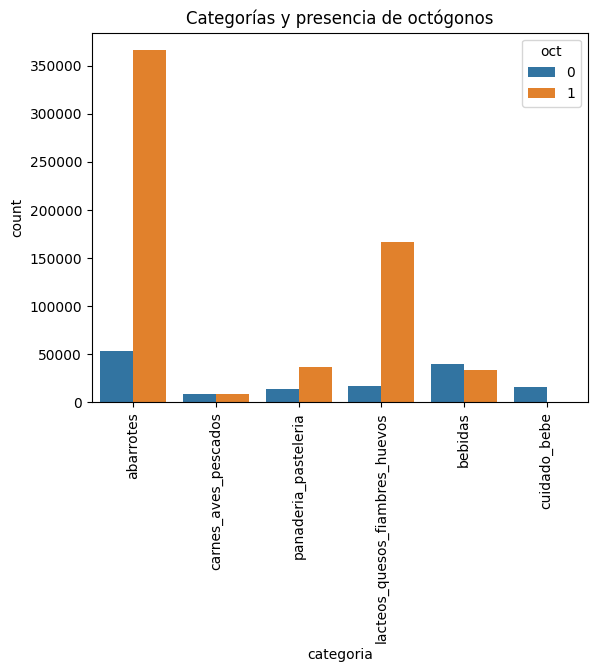

In [ ]:
# Octógonos por categoría
sns.countplot(data=df,x='categoria',hue='oct')
plt.xticks(rotation=90)
plt.title('Categorías y presencia de octógonos')

La mayoría de octógonos están en las categorías abarrotes y lacteos_quesos_fiambres_huevos, y además, en ellas la cantidad de productos sin octógonos es mucho menor que la de productos con octógonos. \
Por otro lado, las categorías carnes_aves_pescados y bebidas tienen cantidades similares de productos con y sin octógonos. \
Por último, la categoría cuidado_bebe no presenta octógonos.

In [ ]:
# Como cuidado_bebe no tiene octógonos, y además no son productos comestibles, la eliminamos
df = df[df['categoria'] != 'cuidado_bebe']

In [ ]:
# Productos con más cantidad de octógonos (a nivel de subcategorias)
df[df['oct']==1].groupby('subcategoria')['oct'].count().sort_values(ascending=False)[0:12]

subcategoria
dulces_confiteria       173843
quesos                   67496
snacks_galletas          58715
desayunos                56184
salsas_condimentos       37807
fiambres                 32390
reposteria               27087
lacteos_leche            26078
embutidos                25244
conservas                16327
jugos                    15873
comidas_instantaneas     15403
Name: oct, dtype: int64

### 3. Análisis de la distribución del precio

In [ ]:
# Missings
df['precio.online'].isna().sum()

174319

In [ ]:
# Missings por subcategoria
df[df['precio.online'].isna()]['subcategoria'].value_counts()

dulces_confiteria                33863
quesos                           22847
salsas_condimentos               11476
desayunos                        11122
embutidos                        10906
snacks_galletas                  10561
fiambres                          8726
lacteos_leche                     8479
reposteria                        7921
conservas                         5780
mantequilla_margarina             5232
masas_bocaditos                   3943
panaderia                         3833
comidas_instantaneas              3536
jugos                             3364
carnes_res_cerdo                  2690
licores                           2681
fideos_pastas                     2554
vinos                             2414
agua                              1795
hamburguesas_nuggets_apanados     1741
frutas_verduras                   1303
gaseosas                          1213
funcionales                       1047
pescados_mariscos                  752
carnes_aves              

In [ ]:
# Imputo el precio mediano de cada subcategoria para los valores perdidos. Uso la mediana en lugar de la media porque, como se verá, hay valores extremos.
df['precio.online'] = df['precio.online'].fillna(round(df.groupby('subcategoria')['precio.online'].transform('median'),2))

In [ ]:
# Elimino los demás missings, pues no hay datos de precio en esa subcategoría que ayuden a hacer imputaciones.
df.dropna(subset='precio.online',inplace=True)

<Axes: xlabel='precio.online', ylabel='Count'>

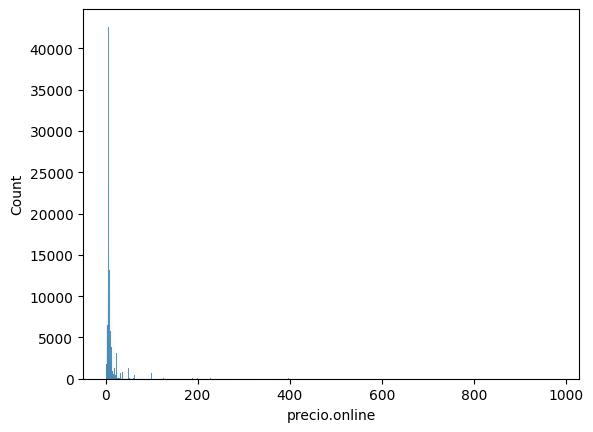

In [ ]:
sns.histplot(data=df,x='precio.online')

In [ ]:
df[df['precio.online']>900].head()

,categoria,subcategoria,descripcion,precio.online,azucar,grasas,sodio,trans,oct
5468,bebidas,licores,whisky johnnie walker blue label botella 750ml,979.9,False,False,False,False,0
13435,bebidas,licores,whisky johnnie walker blue label botella 750ml,979.9,False,False,False,False,0
21395,bebidas,licores,whisky johnnie walker blue label botella 750ml,979.9,False,False,False,False,0
29357,bebidas,licores,whisky johnnie walker blue label botella 750ml,979.9,False,False,False,False,0
37329,bebidas,licores,whisky johnnie walker blue label botella 750ml,979.9,False,False,False,False,0


In [ ]:
# Removiendo los outliers
q_hi = df["precio.online"].quantile(0.99)
df = df[df["precio.online"] < q_hi]

In [ ]:
# Distribución del precio en la base de datos
df['precio.online'].describe()

count    736336.000000
mean         11.278602
std          10.849885
min           0.400000
25%           5.290000
50%           8.300000
75%          13.390000
max          88.900000
Name: precio.online, dtype: float64

<Axes: xlabel='precio.online', ylabel='Count'>

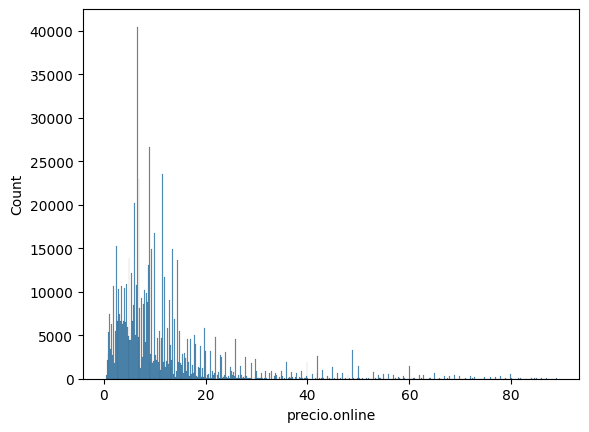

In [ ]:
# Distribución sin outliers
sns.histplot(data=df,x='precio.online')

In [ ]:
# Categorías con precios mayores a 40 soles
df[df['precio.online']>40]['categoria'].value_counts()

bebidas                           13310
lacteos_quesos_fiambres_huevos     9149
carnes_aves_pescados               1522
abarrotes                          1404
panaderia_pasteleria                259
Name: categoria, dtype: int64

In [ ]:
# Categorías con precios menores a 40 soles
df[df['precio.online']<40]['categoria'].value_counts()

abarrotes                         417693
lacteos_quesos_fiambres_huevos    170313
bebidas                            56620
panaderia_pasteleria               50841
carnes_aves_pescados               15173
Name: categoria, dtype: int64

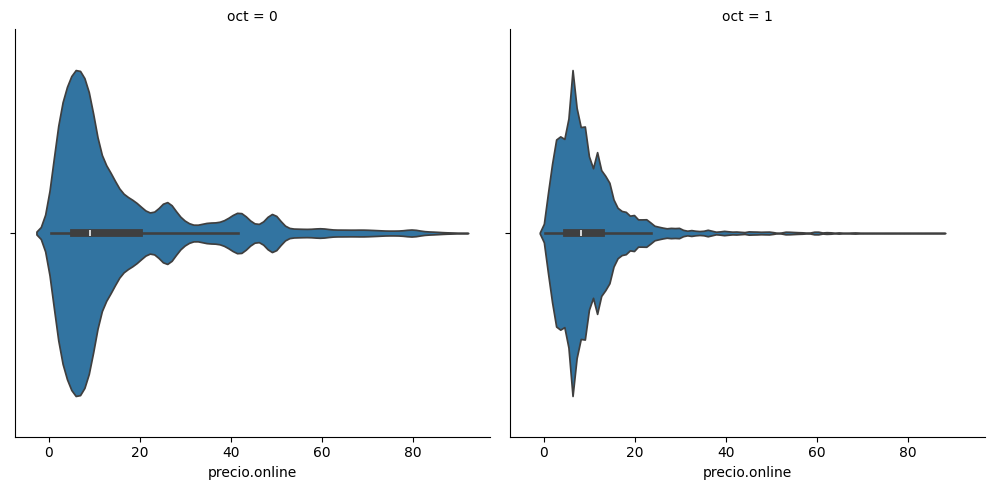

In [ ]:
# Distribución del precio según si hay octógonos o no
sns.catplot(data=df, x='precio.online',col='oct',kind='violin')

In [ ]:
# Precio promedio según si el producto tiene algún octógono o no
df.groupby('oct')['precio.online'].mean()

oct
0    15.914277
1    10.298677
Name: precio.online, dtype: float64

Los precios están sesgados a un lado de la gráfica, pues hay gran diversidad de productos de diferentes categorías. Analicemos la categoría abarrotes, que es la más poblada y cuya mayoría precios están por debajo de 40 soles.

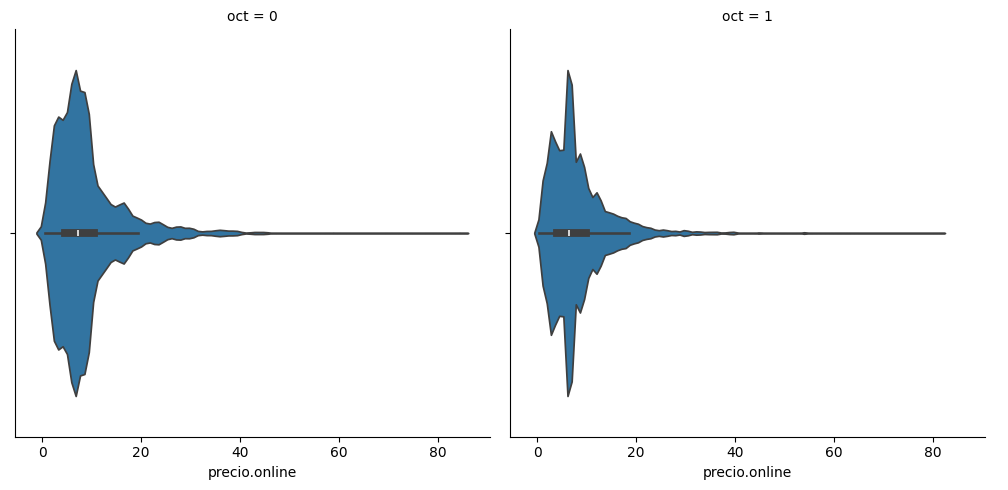

In [ ]:
# Distribución del precio de abarrotes según si hay octógonos o no
sns.catplot(data=df[df['categoria']=='abarrotes'], x='precio.online',col='oct',kind='violin')

In [ ]:
# Precio promedio de los abarrotes según si el producto tiene algún octógono o no
df[df['categoria']=='abarrotes'].groupby('oct')['precio.online'].mean()

oct
0    8.954798
1    8.210235
Name: precio.online, dtype: float64

Se sigue cumpliendo la relación de que en presencia de octógonos, el precio es menor.

### 4. Prueba t

In [ ]:
from scipy.stats import t

Queremos estudiar si la presencia de octógonos implica un precio menor del producto de forma estadísticamente significativa. \
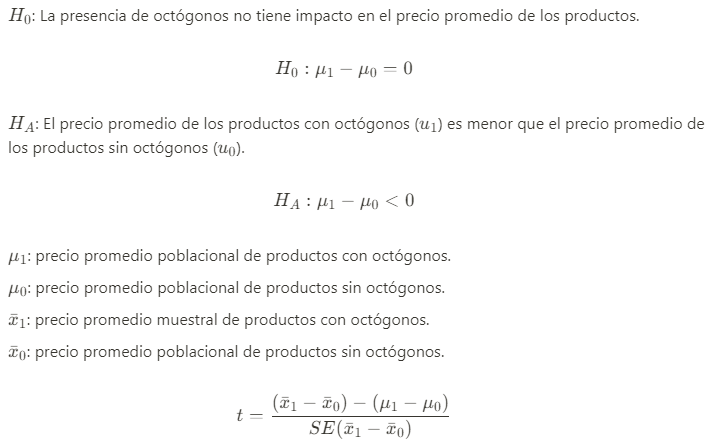




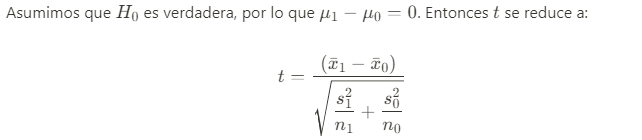

Usaremos un nivel de significancia de α=0.05.

In [ ]:
# Promedios muestrales
xbar = df.groupby('oct')['precio.online'].mean()
# Desviaciones estándar
s = df.groupby('oct')['precio.online'].std()
# Número de elementos
n = df.groupby('oct')['precio.online'].count()

# Calculamos t
numerador = xbar[1]-xbar[0]
denominador = np.sqrt(s[1]**2 / n[1] + s[0]**2 / n[0])
t_stat = numerador/denominador
print('El estadístico t es {}.'.format(t_stat))

El estadístico t es -118.20174510105343.


In [ ]:
# p_value
grados_libertad = n[1] + n[0] - 2
p_value = t.cdf(t_stat, df=grados_libertad)
p_value

0.0

In [ ]:
if p_value<0.05:
  print('p_value = {}. Se rechaza H_0. Entonces hay evidencia de que el precio promedio de los productos con octógonos es menor al de los productos sin octógonos.'.format(p_value))
else:
  print('p_value = {}. No se rechaza H_0. Entonces hay evidencia de que la presencia de octógonos no tiene impacto en el precio promedio de los productos.'.format(p_value))

p_value = 0.0. Se rechaza H_0. Entonces hay evidencia de que el precio promedio de los productos con octógonos es menor al de los productos sin octógonos.


Repetimos este proceso para cada categoria de la muestra.

In [ ]:
dict_hipotesis_resultado = {'categoria':[],'p_value':[],'resultado':[]}
for cat in df['categoria'].unique().tolist():
  condicion = df['categoria'] == cat
  # Promedios muestrales
  xbar = df[condicion].groupby('oct')['precio.online'].mean()
  # Desviaciones estándar
  s = df[condicion].groupby('oct')['precio.online'].std()
  # Número de elementos
  n = df[condicion].groupby('oct')['precio.online'].count()

  # Calculamos t
  numerador = xbar[1]-xbar[0]
  denominador = np.sqrt(s[1]**2 / n[1] + s[0]**2 / n[0])
  t_stat = numerador/denominador

  # Calculamos el p_value
  grados_libertad = n[1] + n[0] - 2
  p_value = t.cdf(t_stat, df=grados_libertad)

  # Resultado (se rechaza o no)
  if p_value<0.05:
    result = 'Se rechaza H_0'
  else:
    result = 'No se rechaza H_0'

  # Agregar al diccionario de resultados
  dict_hipotesis_resultado['categoria'].append(cat)
  dict_hipotesis_resultado['p_value'].append(p_value)
  dict_hipotesis_resultado['resultado'].append(result)

# Crear dataframe
hipotesis_resultado = pd.DataFrame(dict_hipotesis_resultado)
# Mostrar resultados
hipotesis_resultado

,categoria,p_value,resultado
0,abarrotes,2.659850e-113,Se rechaza H_0
1,carnes_aves_pescados,9.987631e-01,No se rechaza H_0
2,panaderia_pasteleria,1.000000e+00,No se rechaza H_0
3,lacteos_quesos_fiambres_huevos,1.000000e+00,No se rechaza H_0
4,bebidas,0.000000e+00,Se rechaza H_0


### 5. Regresión logística

In [ ]:
df.rename(columns={'precio.online':'precio'}, inplace=True)

In [ ]:
from statsmodels.formula.api import logit

# Especificación 1
result1 = logit('oct ~ 0 + precio', data=df).fit()
# Coeficientes
result1.summary()

Optimization terminated successfully.
         Current function value: 0.613286
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    oct   No. Observations:               736336
Model:                          Logit   Df Residuals:                   736335
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                 -0.3247
Time:                        15:08:42   Log-Likelihood:            -4.5158e+05
converged:                       True   LL-Null:                   -3.4089e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
precio         0.0660      0.000    286.736      0.000       0.066       0.066
==============================================================================
"""

El precio tiene un efecto positivo en la probabilidad de que un producto tenga al menos un octógono. En otras palabras, a mayor precio, mayor probabilidad de que el producto tenga algún octógono. Los resultados son significativos al 1%.

In [ ]:
# Especificación 2
result2 = logit('oct ~ 0 + precio + categoria', data=df).fit()
# Coeficientes
result2.summary()

Optimization terminated successfully.
         Current function value: 0.408115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    oct   No. Observations:               736336
Model:                          Logit   Df Residuals:                   736330
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1184
Time:                        15:08:49   Log-Likelihood:            -3.0051e+05
converged:                       True   LL-Null:                   -3.4089e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
categoria[abarrotes]                          2.1601      0.005    405.934      0.000       2.150       2.171
categoria[bebidas]                            0.4474      0.009     48.182      0.000       0.429       0.466
categoria[carnes_aves_pescados]               0.5124      0.017     30.466      0.000       0.479       0.545
categoria[lacteos_quesos_fiambres_huevos]     2.7121      0.010    280.860      0.000       2.693       2.731
categoria[panaderia_pasteleria]               1.2365      0.010    119.399      0.000       1.216       1.257
precio                                       -0.0266      0.000    -94.243      0.000      -0.027      -0.026
=============================================================================================================
"""

Todos los coeficientes son significativos al 1%.
1.   Si los productos son de las categorías abarrotes, bebidas, carnes_aves_pescados, lacteos_quesos_fiambres_huevos y panadería_pasteleria, tienen un impacto positivo sobre la probabilidad de que el producto tenga octógonos.
2.   Un mayor precio impacta negativamente en la probabilidad de que el producto tenga octógonos.

